In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from decimal import Decimal
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [ ]:
# Importing following libraries for preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
# Importing performance metrics
from sklearn import preprocessing,metrics

from sklearn.metrics import (accuracy_score, confusion_matrix, auc, precision_score, recall_score, f1_score, roc_curve, roc_auc_score)
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV)


In [ ]:
# Importing necessary libraries
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# Uploading the data in drive
uploaded = files.upload()

Saving PreProcessedData.csv to PreProcessedData.csv


In [ ]:
# Read Database file using pd.read_csv command, pass CSV file name and path
DataSet = pd.read_csv('PreProcessedData.csv').fillna(0)
df = DataSet.copy()

In [ ]:
df.head()
# Nominal Variables: County, Category, Taxonomic Group, Taxonomic Subgroup, Scientific name, Common name, Year last documented, NY listing status, Federal listing status and Distribution Status
# Ordinal variables: State conservation rank, Global conservation rank

,Unnamed: 0,County,Category,Taxonomic Group,Taxonomic Subgroup,Scientific Name,Common Name,Year Last Documented,NY Listing Status,State Conservation Rank,Global Conservation Rank,Distribution Status
0,0,Albany,Animal,Amphibians,Frogs and Toads,Anaxyrus americanus,American Toad,1990-1999,Game with open season,S5,G5,Recently Confirmed
1,1,Albany,Animal,Amphibians,Frogs and Toads,Anaxyrus fowleri,Fowler's Toad,1990-1999,Game with open season,S4,G5,Recently Confirmed
2,2,Albany,Animal,Amphibians,Frogs and Toads,Hyla versicolor,Gray Treefrog,1990-1999,Game with open season,S5,G5,Recently Confirmed
3,3,Albany,Animal,Amphibians,Frogs and Toads,Lithobates catesbeianus,Bullfrog,1990-1999,Game with open season,S5,G5,Recently Confirmed
4,4,Albany,Animal,Amphibians,Frogs and Toads,Lithobates clamitans,Green Frog,1990-1999,Game with open season,S5,G5,Recently Confirmed


Analyzing the relationship between variable 'Category'  with target variable

Link: https://analyticsindiamag.com/a-beginners-guide-to-chi-square-test-in-python-from-scratch/

In [ ]:
# Extracting Category and Distribution Status variables
df1 = df[['Category','Distribution Status']]

In [ ]:
df1

,Category,Distribution Status
0,Animal,Recently Confirmed
1,Animal,Recently Confirmed
2,Animal,Recently Confirmed
3,Animal,Recently Confirmed
4,Animal,Recently Confirmed
...,...,...
14748,Plant,Historically Confirmed
14749,Plant,Possible but not Confirmed
14750,Plant,Historically Confirmed
14751,Plant,Historically Confirmed


In [ ]:
# Creating cross table for frequency of occurence of categories wrt. Distribution status.
distrib_tab = pd.crosstab(df.Category, df['Distribution Status'], margins = True)

In [ ]:
distrib_tab

Distribution Status,Extirpated,Historically Confirmed,Possible but not Confirmed,Recently Confirmed,All
Category,,,,,
Animal,13,306,9,10537,10865
Natural Community,2,29,0,407,438
Plant,178,1514,404,1354,3450
All,193,1849,413,12298,14753


In [ ]:
# Extracting columns and renaming All as row_totals
distrib_tab.columns = ["Extirpated","Historically Confirmed","Possible but not Confirmed","Recently Confirmed", "row_totals"]

In [ ]:
# Displaying the cross table
distrib_tab

,Extirpated,Historically Confirmed,Possible but not Confirmed,Recently Confirmed,row_totals
Animal,13,306,9,10537,10865
Natural Community,2,29,0,407,438
Plant,178,1514,404,1354,3450
All,193,1849,413,12298,14753


In [ ]:
# Extracting the rows and renaming the All as column_totals
distrib_tab.index = ["Animal","Natural Community","Plant","col_totals"]

In [ ]:
observed = distrib_tab.iloc[0:3,0:4]   # Get table without totals for later use
distrib_tab

,Extirpated,Historically Confirmed,Possible but not Confirmed,Recently Confirmed,row_totals
Animal,13,306,9,10537,10865
Natural Community,2,29,0,407,438
Plant,178,1514,404,1354,3450
col_totals,193,1849,413,12298,14753


In [ ]:
observed

,Extirpated,Historically Confirmed,Possible but not Confirmed,Recently Confirmed
Animal,13,306,9,10537
Natural Community,2,29,0,407
Plant,178,1514,404,1354


How to calculate expected values?

Multiply the row total to the column total and divide by the total number of observations for a cell to get the expected count. So, to calculate the expected counts in python we need to use the np.outer() function on row total and column total. At last, dividing the output of the np.outer() function by observations.

The expected value for each cell in a two-way table is equal to (row total*column total)/n, where n is the total number of observations included in the table.

Example
The two-way table for students choice of grades, athletic ability, or popularity by grade, the expected values are calculated as shown below:

Goals   | 4  	5     6	    Total  	              Goals   | 4  	5     6	     
---------------------------------	            ---------------------------
Grades  | 49 	50    69    168		            Grades  | 46.1 	54.2  67.7
Popular | 24 	36    38     98		           Popular | 26.9 	31.6  39.5     
Sports  | 19 	22    28     69		           Sports  | 18.9 	22.2  27.8     
---------------------------------
Total	| 92   108   135    335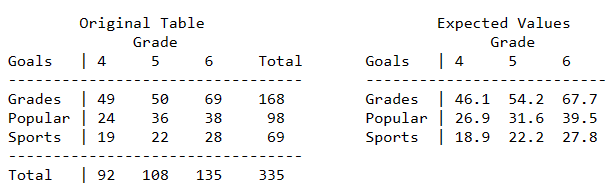

The first cell in the expected values table, Grade 4 with "grades" chosen to be most important, is calculated to be 168*92/335 = 46.1, for example.

In [ ]:
# Calculating the expected frequencies of each category of the
expected =  np.outer(distrib_tab["row_totals"][0:3],
                     distrib_tab.loc["col_totals"][0:4]) / 14753

In [ ]:
# Converting to DataFrame
expected = pd.DataFrame(expected)

In [ ]:
expected

,0,1,2,3
0,142.136854,1361.715244,304.158137,9056.989765
1,5.729953,54.894733,12.261506,365.113807
2,45.133193,432.390022,96.580357,2875.896428


In [ ]:
expected.columns = ["Extirpated","Historically Confirmed","Possible but not Confirmed","Recently Confirmed"]
expected.index = ["Animal","Natural Community","Plant"]

In [ ]:
expected

,Extirpated,Historically Confirmed,Possible but not Confirmed,Recently Confirmed
Animal,142.136854,1361.715244,304.158137,9056.989765
Natural Community,5.729953,54.894733,12.261506,365.113807
Plant,45.133193,432.390022,96.580357,2875.896428


In [ ]:
# Chi-square test
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
print(chi_squared_stat)

6376.449089331835


Note: We call .sum() twice, once to get the column sums and a second time to add the column sums together, returning the sum of the entire 2D table.

In [ ]:
import scipy

In [ ]:
# Chi2 test
scipy.stats.chi2_contingency(observed= observed)

Chi2ContingencyResult(statistic=6376.449089331834, pvalue=0.0, dof=6, expected_freq=array([[1.42136854e+02, 1.36171524e+03, 3.04158137e+02, 9.05698976e+03],
       [5.72995323e+00, 5.48947333e+01, 1.22615061e+01, 3.65113807e+02],
       [4.51331932e+01, 4.32390022e+02, 9.65803565e+01, 2.87589643e+03]]))

Finally, we get a p-value of 0.0 which is less than 0.5. Therefore, we will reject the null hypothesis that says there is no relationship between the features. The test result detects a significant relationship between the variables: Category and Distribution Status.

Chi2 test for Category variable

In [ ]:
df2 = df[['State Conservation Rank','Distribution Status']]

In [ ]:
distrib_tab = pd.crosstab(df2['State Conservation Rank'], df['Distribution Status'], margins = True)

In [ ]:
distrib_tab

Distribution Status,Extirpated,Historically Confirmed,Possible but not Confirmed,Recently Confirmed,All
State Conservation Rank,,,,,
S1,59,731,161,831,1782
S1B,0,3,1,43,47
S1N,0,2,0,6,8
S2,46,523,135,898,1602
S2B,0,42,0,115,157
S3,19,250,55,1144,1468
S3B,0,30,1,486,517
S4,0,73,3,764,840
S4B,0,0,0,316,316


In [ ]:
distrib_tab.columns = ["Extirpated","Historically Confirmed","Possible but not Confirmed","Recently Confirmed", "row_totals"]

In [ ]:
distrib_tab

,Extirpated,Historically Confirmed,Possible but not Confirmed,Recently Confirmed,row_totals
State Conservation Rank,,,,,
S1,59,731,161,831,1782
S1B,0,3,1,43,47
S1N,0,2,0,6,8
S2,46,523,135,898,1602
S2B,0,42,0,115,157
S3,19,250,55,1144,1468
S3B,0,30,1,486,517
S4,0,73,3,764,840
S4B,0,0,0,316,316


In [ ]:
distrib_tab.index = ["S1","S1B","S1N", "S2","S2B", "S3", "S3B", "S4", "S4B", "S5", "S5B", "SH", "SX", "col_totals"]

In [ ]:
observed = distrib_tab.iloc[0:13,0:4]   # Get table without totals for later use
distrib_tab

,Extirpated,Historically Confirmed,Possible but not Confirmed,Recently Confirmed,row_totals
S1,59,731,161,831,1782
S1B,0,3,1,43,47
S1N,0,2,0,6,8
S2,46,523,135,898,1602
S2B,0,42,0,115,157
S3,19,250,55,1144,1468
S3B,0,30,1,486,517
S4,0,73,3,764,840
S4B,0,0,0,316,316
S5,0,6,0,3557,3563


In [ ]:
observed

,Extirpated,Historically Confirmed,Possible but not Confirmed,Recently Confirmed
S1,59,731,161,831
S1B,0,3,1,43
S1N,0,2,0,6
S2,46,523,135,898
S2B,0,42,0,115
S3,19,250,55,1144
S3B,0,30,1,486
S4,0,73,3,764
S4B,0,0,0,316
S5,0,6,0,3557


In [ ]:
# Applying chi2 test
scipy.stats.chi2_contingency(observed= observed)

Chi2ContingencyResult(statistic=7920.977305215294, pvalue=0.0, dof=36, expected_freq=array([[2.33122755e+01, 2.23338846e+02, 4.98858537e+01, 1.48546302e+03],
       [6.14857995e-01, 5.89053074e+00, 1.31573239e+00, 3.91788789e+01],
       [1.04656680e-01, 1.00264353e+00, 2.23954450e-01, 6.66874534e+00],
       [2.09575002e+01, 2.00779367e+02, 4.48468786e+01, 1.33541625e+03],
       [2.05388734e+00, 1.96768793e+01, 4.39510608e+00, 1.30874127e+02],
       [1.92045008e+01, 1.83985088e+02, 4.10956416e+01, 1.22371477e+03],
       [6.76343794e+00, 6.47958381e+01, 1.44730563e+01, 4.30967668e+02],
       [1.09889514e+01, 1.05277571e+02, 2.35152172e+01, 7.00218261e+02],
       [4.13393886e+00, 3.96044194e+01, 8.84620077e+00, 2.63415441e+02],
       [4.66114689e+01, 4.46552362e+02, 9.97437131e+01, 2.97009246e+03],
       [5.39897648e+01, 5.17238731e+02, 1.15532502e+02, 3.44023900e+03],
       [2.76031993e+00, 2.64447231e+01, 5.90679862e+00, 1.75888158e+02],
       [1.50443977e+00, 1.44130007e+01,

Finally, we get a p-value of 0.0 which is less than 0.5. Therefore, we will reject the null hypothesis that says there is no relationship between the features. The test result detects a significant relationship between the variables: State Conservation Rank and Distribution Status.

Analyzing relationship of Global Conservation Rank with target variable

In [ ]:
df3 = df[['Global Conservation Rank','Distribution Status']]

In [ ]:
distrib_tab = pd.crosstab(df3['Global Conservation Rank'], df3['Distribution Status'], margins = True)

In [ ]:
distrib_tab

Distribution Status,Extirpated,Historically Confirmed,Possible but not Confirmed,Recently Confirmed,All
Global Conservation Rank,,,,,
G1,2,2,0,9,13
G2,3,16,3,57,79
G3,17,84,10,297,408
G4,36,305,41,991,1373
G5,134,1437,359,10944,12874
GH,1,5,0,0,6
All,193,1849,413,12298,14753


In [ ]:
distrib_tab.columns = ["Extirpated","Historically Confirmed","Possible but not Confirmed","Recently Confirmed", "row_totals"]

In [ ]:
distrib_tab

,Extirpated,Historically Confirmed,Possible but not Confirmed,Recently Confirmed,row_totals
Global Conservation Rank,,,,,
G1,2,2,0,9,13
G2,3,16,3,57,79
G3,17,84,10,297,408
G4,36,305,41,991,1373
G5,134,1437,359,10944,12874
GH,1,5,0,0,6
All,193,1849,413,12298,14753


In [ ]:
distrib_tab.index = ["G1","G2","G3", "G4","G5", "GH", "col_totals"]

In [ ]:
observed = distrib_tab.iloc[0:6,0:4]   # Get table without totals for later use
distrib_tab

,Extirpated,Historically Confirmed,Possible but not Confirmed,Recently Confirmed,row_totals
G1,2,2,0,9,13
G2,3,16,3,57,79
G3,17,84,10,297,408
G4,36,305,41,991,1373
G5,134,1437,359,10944,12874
GH,1,5,0,0,6
col_totals,193,1849,413,12298,14753


In [ ]:
observed

,Extirpated,Historically Confirmed,Possible but not Confirmed,Recently Confirmed
G1,2,2,0,9
G2,3,16,3,57
G3,17,84,10,297
G4,36,305,41,991
G5,134,1437,359,10944
GH,1,5,0,0


In [ ]:
# Applying chi2 test
scipy.stats.chi2_contingency(observed= observed)

Chi2ContingencyResult(statistic=293.75358088382234, pvalue=1.1086639600551172e-53, dof=15, expected_freq=array([[1.70067105e-01, 1.62929574e+00, 3.63925981e-01, 1.08367112e+01],
       [1.03348471e+00, 9.90110486e+00, 2.21155019e+00, 6.58538602e+01],
       [5.33749068e+00, 5.11348200e+01, 1.14216769e+01, 3.40106012e+02],
       [1.79617027e+01, 1.72078696e+02, 3.84361825e+01, 1.14452342e+03],
       [1.68418762e+02, 1.61350410e+03, 3.60398699e+02, 1.07316784e+04],
       [7.84925100e-02, 7.51982648e-01, 1.67965837e-01, 5.00155900e+00]]))

Finally, we get a p-value of 1.1086639600551172e-53 which is less than 0.5. Therefore, we will reject the null hypothesis that says there is no relationship between the features. The test result detects a significant relationship between the variables: Global Conservation Rank and Distribution Status.